In [122]:
import pandas as pd
import numpy as np
import os
import scipy
from pbn import operations  as ops
from pbn import conversions as convert
from matplotlib import pyplot as plt
from matplotlib import image  as matimg
from scipy import ndimage
from pbn import suite as pbn_suite
%matplotlib inline

# Load Image

In [123]:
n_colors=36
img_name = 'tropical'
img_path = lambda filename: os.path.join('/home/eczech/data/pbn/paintings', img_name, filename)

(600, 800, 3)


/home/eczech/anaconda/envs/py3.4/lib/python3.4/site-packages/scipy/ndimage/interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


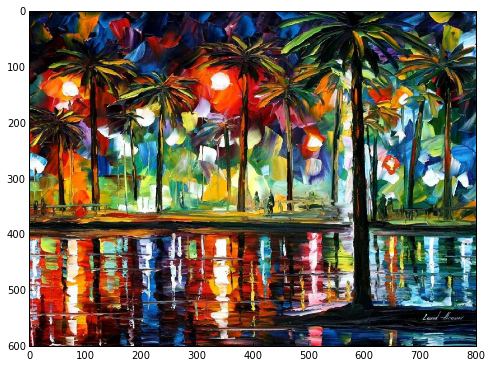

In [143]:
img_raw = matimg.imread(img_path('source.png'))

#img_rgb = img_rgb[-600:, 0:400]
tw = [(0, 600), (1040-800, 1040)]
#tw = None
img_rgb = scipy.ndimage.zoom(img_raw, (.717, .717, 1), order=1)
if tw is not None:
       img_rgb = img_rgb[tw[0][0]:tw[0][1], tw[1][0]:tw[1][1]]
img_shape = img_rgb.shape
print(img_shape)

plt.figure(figsize=(12,6))
plt.imshow(img_rgb)

In [ ]:
img_df = ops.unravel(convert.rgb_to_lab(img_rgb))

# Select Hyperparameters

In [ ]:
# grid = {'alpha': [.01, .006], 'n_components': [650]} # catamaran
grid = {'alpha': [.02, .005], 'n_components': [1200]} # sailboat
grid_res = pbn_suite.run_cluster_grid(img_df, grid, par_n_jobs=-1)

In [ ]:
cluster_grid_res = pbn_suite.show_cluster_grid_results(grid_res, img_shape, n_cols=2)

In [111]:
cluster_grid_res

In [ ]:
from IPython.display import Audio
sound_file = '/Users/eczech/Downloads/alert.mp3'
Audio(sound_file, autoplay=True)

### Select Result From Above

In [112]:
for i, r in enumerate(grid_res):
    print('{}: alpha = {}, n_components = {}'.format(i, r['alpha'], r['n_components']))

0: alpha = 0.02, n_components = 1200
1: alpha = 0.005, n_components = 1200


In [113]:
res_idx = 0
res = grid_res[res_idx]

# Cluster Colors

In [114]:
cols = [c for c in res['img_df'].columns if c.endswith('_m')]
c_res = pbn_suite.get_color_clusters(res['img_df'], cols, res['alpha'], n_colors)

### Show Inferred Clusters

(600, 800, 3)


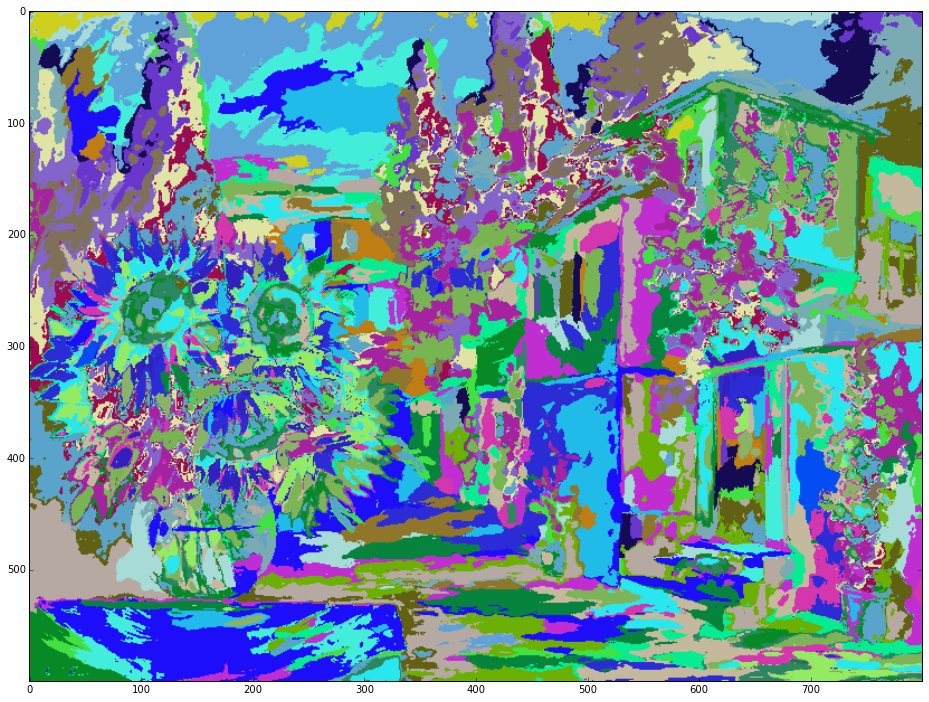

In [115]:
img_cluster_highlight = pbn_suite.get_cluster_highlights(c_res['img_df'], img_shape, 'cc')
plt.figure(figsize=(24,12))
plt.imshow(img_cluster_highlight)

# Determine Cluster Properties

In [116]:
#c_props = pbn_suite.get_cluster_properties(c_res['img_df'], img_shape, threshold=.8, shrinkage=1, n_iterations=1)
# shrinkage --> less means more detailed
# threshold --> less means more detailed

# catamaran, sailboat
c_props = pbn_suite.get_cluster_properties(c_res['img_df'], img_shape, threshold=.8, shrinkage=1, n_iterations=1)

# downtown
#c_props = pbn_suite.get_cluster_properties(c_res['img_df'], img_shape, threshold=.6, shrinkage=2, n_iterations=1)

1815 clusters collapsed of 10605


/home/eczech/repos/portfolio/functional/paint_by_numbers/python/pbn/operations.py:251: FutureWarning: order is deprecated, use sort_values(...)
  top_neighbor = votes.order(ascending=False)[:1]


# Render Final Images

In [117]:
pbn = pbn_suite.render(c_props['properties'], img_rgb, res['alpha'], 
                       scale_factor=3, bkg=[1,1,1], edg=[.5,.5,.5], lbl=[.3,.3,.3])

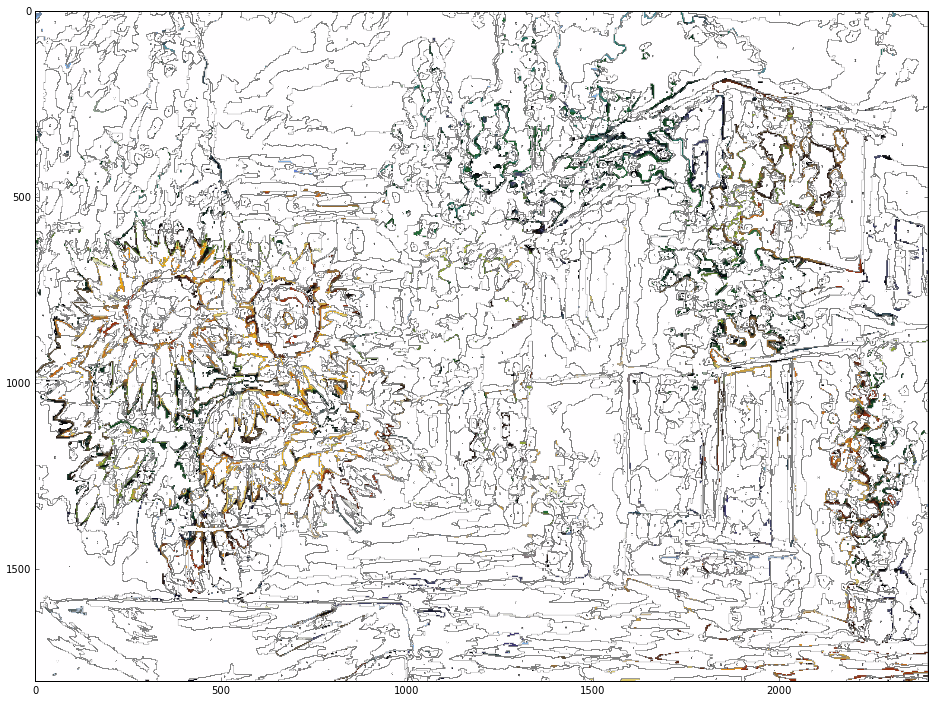

In [118]:
plt.figure(figsize=(24,18))
plt.imshow(pbn['pbn_unsolved'])

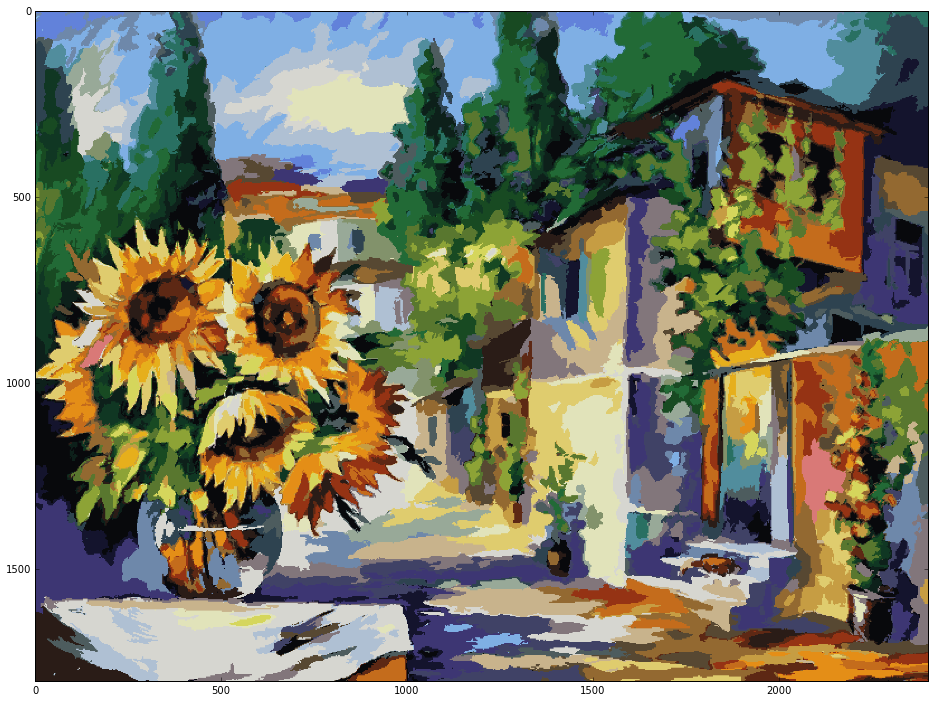

In [119]:
plt.figure(figsize=(24,18))
plt.imshow(pbn['pbn_solved'])

# Save Results

In [120]:
p1, p2, p3 = img_path('unpainted.png'), img_path('painted.png'), img_path('swatch.png')
matimg.imsave(p1, pbn['pbn_unsolved'])
matimg.imsave(p2, pbn['pbn_solved'])

/home/eczech/repos/portfolio/functional/paint_by_numbers/python/pbn/suite.py:177: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  return rgb_sorted.sort('index')
/home/eczech/repos/portfolio/functional/paint_by_numbers/python/pbn/suite.py:189: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  rgb_df = _sort_rgb_index(rgb_df).set_index('letter').sort('index')


'/home/eczech/data/pbn/paintings/greek/swatch.png'

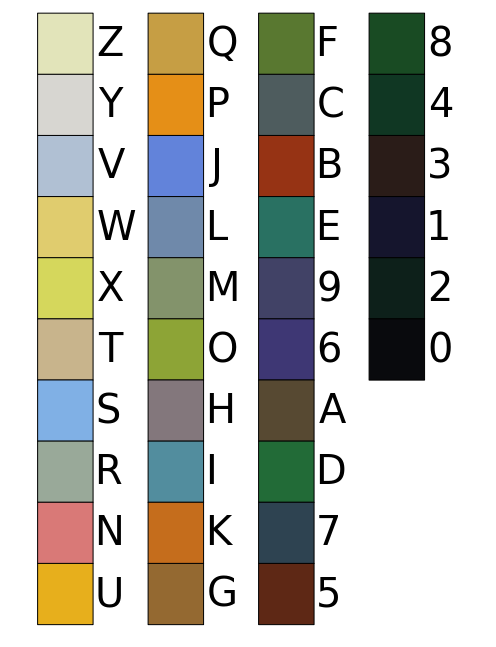

In [121]:
pbn_suite.export_color_swatch(p3, pbn['color_index'], res['alpha'],
                             swatch_height=500, swatch_width=500, colors_per_col=10, font_size=40)